<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 4*

---

# 📝 Assignment

# 1. EDA
- kaggle의 marketing promotion campaign 데이터셋을 이용합니다. 다음 링크에서 다운받으세요.

  https://www.kaggle.com/davinwijaya/customer-retention

- 데이터셋을 불러옵니다. 

- 샘플 사이즈를 확인합니다. 
  - 샘플 사이즈가 충분한지 확인해 보세요. 

- 결측치 및 데이터 타입을 확인합니다. 
  - 데이터 타입이 적절한지 확인해 보세요. 

- 중복된 데이터를 확인 후 제거합니다. 

- `history` 컬럼에서 이상치를 확인합니다.
  - box plot을 그려 보세요. 
  - histogram을 그려 보세요. 
  - 이상치를 제거합니다. 

- `used_bogo` 컬럼에서 이전에 1+1을 사용한 고객(1)과 사용하지 않은 고객(0)의 비율을 확인합니다. 
  - bar plot으로 나타내 보세요. 

In [2]:
import pandas as pd
import numpy as np
from google.colab import files

file = files.upload()

Saving data.csv to data.csv


In [6]:
# 데이터 셋 불러오기
data = pd.read_csv('data.csv')

# 샘플사이즈 확인
data.shape

# 결측치 및 데이터 확인
data.info()
data.isnull().sum()

# 중복데이터 확인
data = data.drop_duplicates()
data.reset_index(drop = True, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


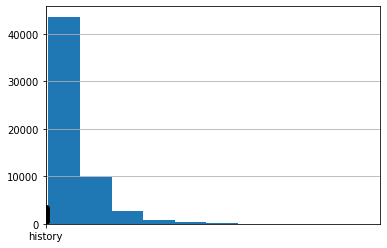

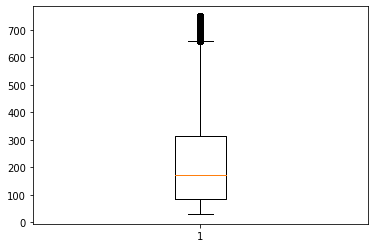

In [9]:
# history 칼럼에서 이상치 확인 및 제거
import matplotlib.pyplot as plt
import seaborn as sns

boxplt = data.boxplot(column=['history'])
plt.hist(data['history'])
plt.show()
data_edit = data[data['history'] < 750]

plt.boxplot(data_edit['history'])
plt.show()
data_edit.reset_index(drop = True, inplace = True)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
54225,7,86.46,0,1,Urban,0,Web,Discount,0
54226,10,105.54,1,0,Urban,0,Web,Discount,0
54227,5,38.91,0,1,Urban,1,Phone,Discount,0
54228,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


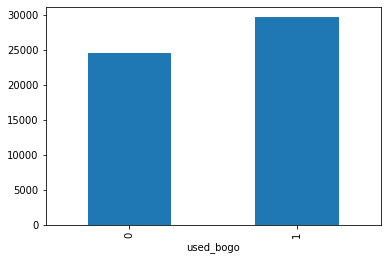

In [10]:
# used_bogo 컬럼에서 이전에 1+1을 사용한 고객(1)과 사용하지 않은 고객(0)의 비율을 확인
df = data_edit.groupby(['used_bogo']).count()
df['history'].plot.bar()
data_edit['used_bogo'].value_counts(normalize=True)
# 0 : 24544
# 1 : 29686
data_edit

# 2. 가설검정 
- 귀무가설과 대립가설을 설정하세요. 
- `used_bogo` 컬럼에 대해서 다음 전환율(CTR)을 확인하세요. 
  - 전체 데이터셋
  - 대조군(control) 그룹 (`used_bogo==0`)
  - 실험군(experiment) 그룹 (`used_bogo==1`) 
  - 두 그룹의 전환율 차이(실험군 CTR $-$ 대조군 CTR)를 변수 `ctr_diff`에 저장하세요. 
- choice method를 사용하여 가설검정을 진행한 후 결과를 해석하세요. 
  - 대조군 그룹의 귀무가설 simulate
  - 실험군 그룹의 귀무가설 Simulate
  - 실험군과 대조군 그룹 평균 차이의 귀무가설 simulate 
- binomial distribution을 사용하여 가설검정을 진행한 후 결과를 해석하세요. 
- z-test를 사용하여 가설검정을 진행한 후 결과를 해석하세요. 


In [12]:
# 귀무가설과 대립가설 설정
# 귀무가설 : 이전에 1+1을 사용하지 않았던 고객의 전환율은 사용했던 고객의 전환율과 같거나 더 높다.
# 대립가설 : 이전에 1+1을 사용하지 않았던 고객의 전환율은 사용했던 고객의 전환율보다 낮다.
data_edit[(data_edit['conversion'] != 0)]

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
10,7,548.91,0,1,Urban,1,Phone,Buy One Get One,1
13,2,101.64,0,1,Urban,0,Web,Discount,1
15,3,58.13,1,0,Urban,1,Web,No Offer,1
21,2,118.40,1,0,Surburban,0,Web,Discount,1
...,...,...,...,...,...,...,...,...,...
54189,2,93.97,1,0,Urban,0,Web,No Offer,1
54195,4,337.36,1,0,Urban,0,Web,Discount,1
54209,8,29.99,0,1,Surburban,0,Web,No Offer,1
54216,9,29.99,1,0,Urban,0,Phone,Discount,1


# 🔥 도전과제

## ANOVA

우리는 지금까지 한 표본 또는 두 표본에 대해서 가설검정을 시행해 보았습니다.

그렇다면 표본이 세 개 이상일 때는 어떻게 가설검정을 할 수 있을까요? 

다음 링크를 통해 ANOVA에 대한 글을 읽고, 주어진 4개 그룹의 평균에 대하여 차이가 있는지 가설검정을 시행하세요. 

https://partrita.github.io/posts/ANOVA-python/

```
A : 38 33 35 92 76 97 88 41 11 9
B : 18 52 62 48 30 40 87 12 97 82
C : 28 90 5 49 66 73 96 80 4 17
D : 8 99 4 12 7 64 18 10 9 20
```

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다. 